In [7]:
import pandas as pd
import numpy as np

# Load Excel file
df = pd.read_csv(r"C:\Users\pavit\Downloads\OneDrive\Documents\AI Project_ RealtyAI Smart Real Estate Insight Platform\Real Estate Data V21.csv")

# Function to clean price strings safely
def clean_price(x):
    if pd.isnull(x):
        return np.nan
    x = str(x).replace("₹", "").strip()
    try:
        if "L" in x:  # Lakhs
            return float(x.replace("L", "").strip()) * 1e5
        elif "Cr" in x:  # Crores
            return float(x.replace("Cr", "").strip()) * 1e7
        else:
            # Try plain numeric conversion (if it's already a number string)
            return pd.to_numeric(x, errors="coerce")
    except:
        return np.nan  # If conversion fails, mark as NaN

# Apply cleaning
df["Price_Cleaned"] = df["Price"].apply(clean_price)

# Check results
print(df[["Price", "Price_Cleaned"]].head(20))


       Price  Price_Cleaned
0   ₹1.99 Cr     19900000.0
1   ₹2.25 Cr     22500000.0
2    ₹1.0 Cr     10000000.0
3   ₹3.33 Cr     33300000.0
4    ₹48.0 L      4800000.0
5    ₹40.0 L      4000000.0
6    ₹60.0 L      6000000.0
7   ₹72.35 L      7235000.0
8    ₹42.0 L      4200000.0
9    ₹30.0 L      3000000.0
10   ₹29.4 L      2940000.0
11   ₹1.3 Cr     13000000.0
12   ₹8.5 Cr     85000000.0
13  ₹1.15 Cr     11500000.0
14   ₹49.0 L      4900000.0
15   ₹57.0 L      5700000.0
16   ₹25.0 L      2500000.0
17   ₹2.6 Cr     26000000.0
18  ₹2.97 Cr     29700000.0
19  ₹1.62 Cr     16200000.0


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\pavit\Downloads\OneDrive\Documents\AI Project_ RealtyAI Smart Real Estate Insight Platform\Real Estate Data V21.csv")
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [10]:
df.describe(include="all")

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
count,14528,14528,14528,14528,14528.000000,14528.000000,14528,14528.000000,14528
unique,9998,6507,891,7050,NaN,NaN,14490,NaN,2
top,Classic Apartment,"2 BHK Flat for sale in Electronic City, Bangalore",₹60.0 L,"Sector 12 Dwarka, New Delhi",NaN,NaN,"Premier Inspira Maplewood in Sarjapur Road, Ba...",NaN,Yes
freq,42,53,407,44,NaN,NaN,5,NaN,8580
mean,NaN,NaN,NaN,NaN,1297.916988,11719.456222,NaN,2.751239,NaN
std,NaN,NaN,NaN,NaN,1245.694305,49036.068632,NaN,0.898243,NaN
min,NaN,NaN,NaN,NaN,70.000000,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,650.000000,4480.000000,NaN,2.000000,NaN
50%,NaN,NaN,NaN,NaN,1000.000000,6050.000000,NaN,3.000000,NaN
75%,NaN,NaN,NaN,NaN,1439.000000,9312.500000,NaN,3.000000,NaN


In [37]:
#Basic Information
print("Shape of dataset:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (14528, 9)

Column Data Types:
 Name               object
Property Title     object
Price              object
Location           object
Total_Area          int64
Price_per_SQFT    float64
Description        object
Baths               int64
Balcony            object
dtype: object

Missing Values:
 Name              0
Property Title    0
Price             0
Location          0
Total_Area        0
Price_per_SQFT    0
Description       0
Baths             0
Balcony           0
dtype: int64


In [38]:
# Summary Statistics
df.describe()

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


In [39]:
# Unique values in categorical columns
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")

Name: 9998 unique values
Property Title: 6507 unique values
Price: 891 unique values
Location: 7050 unique values
Description: 14490 unique values
Balcony: 2 unique values


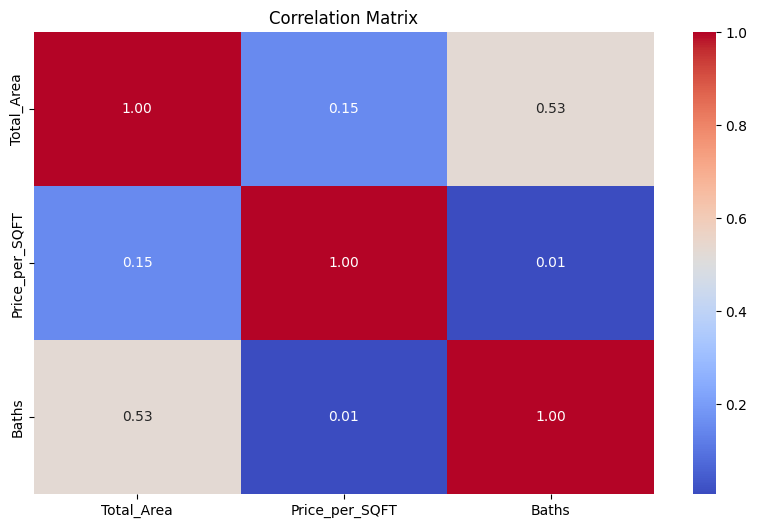

In [14]:
#Missing values heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

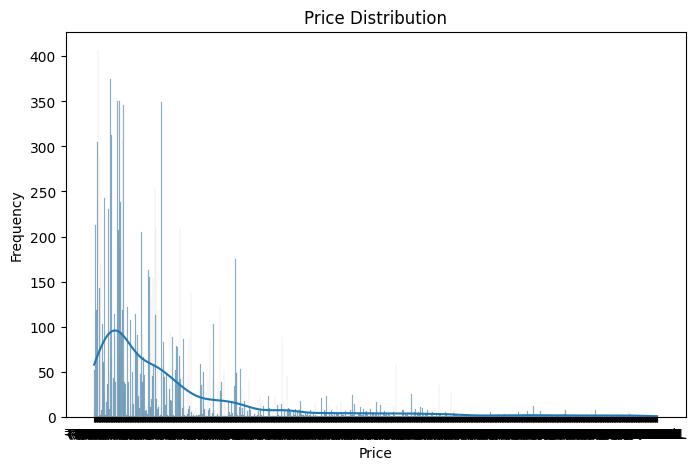

In [13]:
#price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

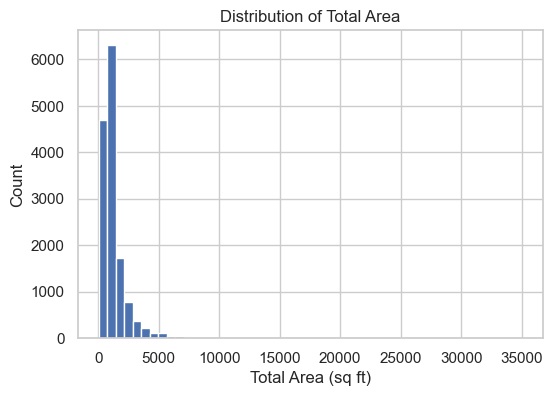

In [40]:
# Distribution of Total Area
df['Total_Area'].hist(bins=50, figsize=(6,4))
plt.title("Distribution of Total Area")
plt.xlabel("Total Area (sq ft)")
plt.ylabel("Count")
plt.show()

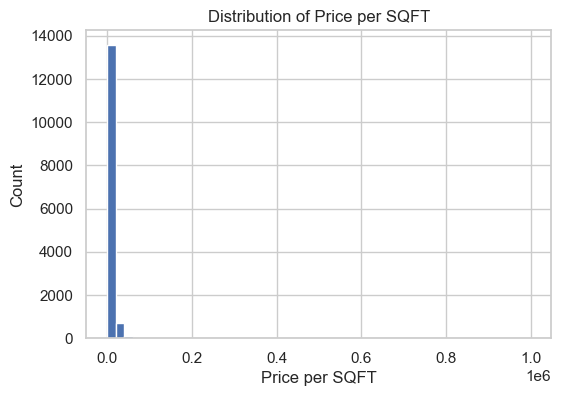

In [41]:
# Distribution of Price per SQFT
df['Price_per_SQFT'].hist(bins=50, figsize=(6,4))
plt.title("Distribution of Price per SQFT")
plt.xlabel("Price per SQFT")
plt.ylabel("Count")
plt.show()

C:\Users\pavit\AppData\Local\Temp\ipykernel_11684\1155891490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Baths", data=df, palette="viridis")


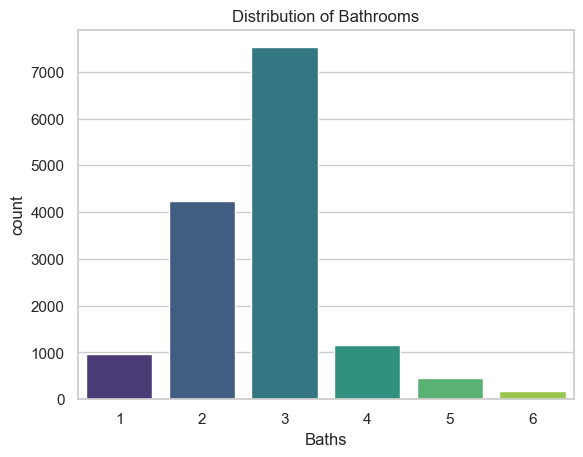

In [42]:
# Countplot for number of bathrooms
sns.countplot(x="Baths", data=df, palette="viridis")
plt.title("Distribution of Bathrooms")
plt.show()

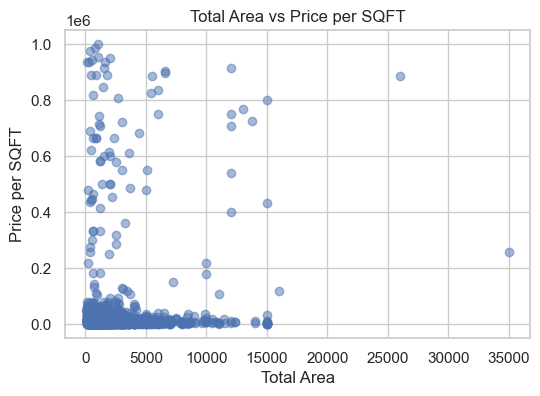

In [43]:
# Scatter plot between Area and Price per SQFT
plt.figure(figsize=(6,4))
plt.scatter(df['Total_Area'], df['Price_per_SQFT'], alpha=0.5)
plt.title("Total Area vs Price per SQFT")
plt.xlabel("Total Area")
plt.ylabel("Price per SQFT")
plt.show()

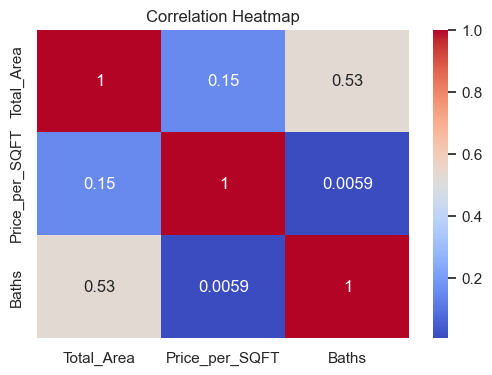

In [44]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\pavit\AppData\Local\Temp\ipykernel_11684\270648293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="mako")


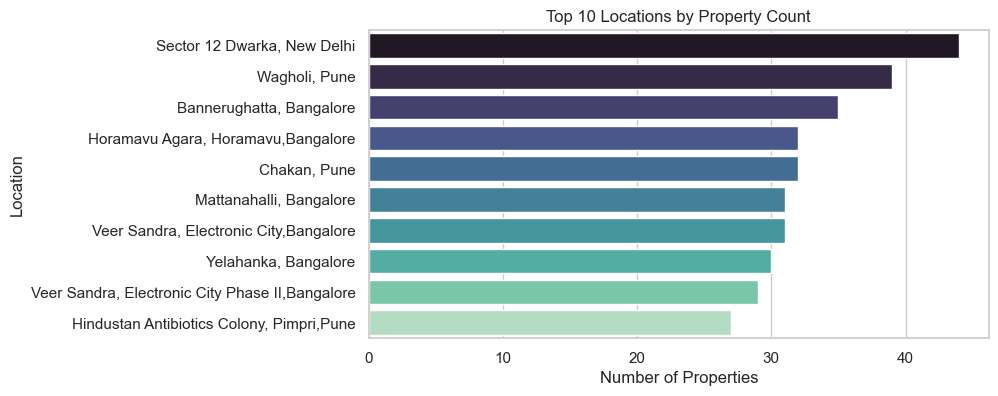

In [45]:
# 📌 Step 7: Location Analysis (Top 10 Locations)
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="mako")
plt.title("Top 10 Locations by Property Count")
plt.xlabel("Number of Properties")
plt.ylabel("Location")
plt.show()